<a href="https://colab.research.google.com/github/dipeshkarki510/CoronaML/blob/master/CoronaNOAA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS MACHINE LEARNING SCRIPT ATTEMPTS TO DEVELOP THE DEEP LEARNING MODEL IN KERAS WITH TENSOR FLOW IN BACKEND TO PREDICT THE NUMBER OF CONFIRMED CORONA VIRUSS CASE WITH PRECIPITATION AND TEMPERATURE AS THE INPUTS. THE MODEL TAKES DATA FROM NOAA WHICH USES 9000 EARTH STATION TO RECORD DAILY TEMPERATURE AND PRESIPITATION. TEMPERATURE DATA ARE IN TENTH OF CENTIGRADE WHILE PRESPITATION IS ALSO IN TENTH OF MM. MEANWHILE THE COVID CASE FROM JAN 2) ONWARDS ARE ONLY CONSIDERED.

THE MODEL USES RELU AS ACTIVATION FUNCTION AND ADAM ALGORITHM AS OPTIMIZER WITH MEAN_SQUARE_ERROR AS LOSS FUNCTION. SINCE MACHINE LEARNING DOESN"T GIVE CAUSATION THIS MODEL IN NO MEAN IMPLIES THERE IS RELATION BETWEEN TEMPERATURE AND PRESIPITATION ON COVID-19 CASES

MAJOR LIMITATION OF THE MODEL IS IT DOESN"T CONSIDER THE STATEWISE DATA FROM US,AND AUSTRALIA

NOAA DATA CAN BE RETRIEVE IN R USING WORLDMET DATA. THE BEST PAPER TO EXPLAIN THIS IS FROM RECENT MIT PAPER Bukhari, Q., & Jameel, Y. (2020). Will coronavirus pandemic diminish by summer?. Available at SSRN 3556998.
THE TRAINING HOWEVER DOESN'T SHOW CONVERGENCE

The tr

In [0]:
import numpy as np
import pandas as pd


# First Step is PULL NOAA weather data from National Oceanic and Atmospheric association 


Summary of the Day Format
The yearly files are formatted so that every observation is represented by a single row with the following fields:

ID = 11 character station identification code. Please see ghcnd-stations section below for an explantation
YEAR/MONTH/DAY = 8 character date in YYYYMMDD format (e.g. 19860529 = May 29, 1986)
ELEMENT = 4 character indicator of element type
DATA VALUE = 5 character data value for ELEMENT
M-FLAG = 1 character Measurement Flag
Q-FLAG = 1 character Quality Flag
S-FLAG = 1 character Source Flag
OBS-TIME = 4-character time of observation in hour-minute format (i.e. 0700 =7:00 am

In [0]:
noaadaily=pd.read_csv("ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/2020.csv.gz",compression="gzip",header=None,names=["StationId","DateStr", "Element", "Data", "M_Flag","Q_Flag","S_flag","OBS_Time"])



In [0]:
noaadaily.head()


,StationId,DateStr,Element,Data,M_Flag,Q_Flag,S_flag,OBS_Time
0,US1FLSL0019,20200101,PRCP,0,NaN,NaN,N,NaN
1,US1FLSL0019,20200101,SNOW,0,NaN,NaN,N,NaN
2,US1NVNY0012,20200101,PRCP,0,NaN,NaN,N,NaN
3,US1NVNY0012,20200101,SNOW,0,NaN,NaN,N,NaN
4,US1ILWM0012,20200101,PRCP,0,NaN,NaN,N,NaN


STATION ID Explaination
ID = the station identification code.
The first two characters denote the FIPS country code
The third character is a network code that identifies the station numbering system used
0 = unspecified (station identified by up to eight alphanumeric characters)
1 = Community Collaborative Rain, Hail,and Snow (CoCoRaHS) based identification number. To ensure consistency with with GHCN Daily, all numbers in the original CoCoRaHS IDs have been left-filled to make them all four digits long. In addition, the characters “-” and “_” have been removed to ensure that the IDs do not exceed 11 characters when preceded by “US1”. For example, the CoCoRaHS ID “AZ-MR-156” becomes “US1AZMR0156” in GHCN-Daily
C = U.S. Cooperative Network identification number (last six characters of the GHCN-Daily ID)
E = Identification number used in the ECA&D non-blended dataset
M = World Meteorological Organization ID (last five characters of the GHCN-Daily ID)
N = Identification number used in data supplied by a National Meteorological or Hydrological Center
R = U.S. Interagency Remote Automatic Weather Station (RAWS) identifier
S = U.S. Natural Resources Conservation Service SNOwpack TELemtry (SNOTEL) station identifier
W = WBAN identification number (last five characters of the GHCN-Daily ID)
The remaining eight characters contain the actual station ID.

In [0]:
#Extract FIPSCountryCode from the stationid
noaadaily['FIPSCountryCode']=noaadaily['StationId'].str.slice(0,2)

In [5]:
noaadaily.head() 

,StationId,DateStr,Element,Data,M_Flag,Q_Flag,S_flag,OBS_Time,FIPSCountryCode
0,US1FLSL0019,20200101,PRCP,0,NaN,NaN,N,NaN,US
1,US1FLSL0019,20200101,SNOW,0,NaN,NaN,N,NaN,US
2,US1NVNY0012,20200101,PRCP,0,NaN,NaN,N,NaN,US
3,US1NVNY0012,20200101,SNOW,0,NaN,NaN,N,NaN,US
4,US1ILWM0012,20200101,PRCP,0,NaN,NaN,N,NaN,US


**MAIN ELEMENTS ARE** \n

PRCP = Precipitation (tenths of mm)
SNOW = Snowfall (mm)
SNWD = Snow depth (mm)
TMAX = Maximum temperature (tenths of degrees C)
TMIN = Minimum temperature (tenths of degrees C)

In [6]:
noaadaily.shape

(7570004, 9)

In [0]:
#Extract only the precipitation and the max temperature from the weather station
#indexNames = noaadailytemp[ (noaadailytemp['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
indexNames = noaadaily[ (noaadaily['Element'] =='TMAX') |(noaadaily['Element'] =='PRCP')  ].index
#dfObj.drop(indexNames , inplace=True)




Selecting only those rows that matches the index

In [0]:
noaa_daily_tempmax_percep=noaadaily.loc[indexNames]

In [0]:
noaa_daily_tempmax_percep.shape

(3144141, 9)

In [10]:
noaa_daily_tempmax_percep.loc[noaa_daily_tempmax_percep["FIPSCountryCode"]=='NP'].count

<bound method DataFrame.count of            StationId   DateStr Element  ...  S_flag OBS_Time FIPSCountryCode
90637    NP000444540  20200101    TMAX  ...       S      NaN              NP
90638    NP000444540  20200101    PRCP  ...       S      NaN              NP
148431   NPM00044477  20200102    TMAX  ...       S      NaN              NP
148433   NPM00044477  20200102    PRCP  ...       S      NaN              NP
183432   NP000444540  20200102    TMAX  ...       S      NaN              NP
...              ...       ...     ...  ...     ...      ...             ...
7423579  NP000444540  20200328    PRCP  ...       S      NaN              NP
7464709  NPM00044477  20200329    TMAX  ...       S      NaN              NP
7464711  NPM00044477  20200329    PRCP  ...       S      NaN              NP
7489717  NP000444540  20200329    TMAX  ...       S      NaN              NP
7489719  NP000444540  20200329    PRCP  ...       S      NaN              NP

[277 rows x 9 columns]>

In [0]:
#remove date before January 20
noaa_daily_tempmax_percep_after_jan20=noaa_daily_tempmax_percep.drop(noaa_daily_tempmax_percep[noaa_daily_tempmax_percep['DateStr']<20200120].index)

In [12]:
noaa_daily_tempmax_percep_after_jan20.shape

(2414053, 9)

# PULL FIPSCountry Code from the isocode in google drvie

In [14]:
fipscountrycode=pd.read_csv("/content/sample_data/fips-10-4-to-iso-country-codes.csv")
fipscountrycode.head

<bound method NDFrame.head of     FIPS 10-4 ISO 3166            Name
0          AF       AF     Afghanistan
1          AX        -        Akrotiri
2          AL       AL         Albania
3          AG       DZ         Algeria
4          AQ       AS  American Samoa
..        ...      ...             ...
274         -        -           World
275        YM       YE           Yemen
276         -        -           Zaire
277        ZA       ZM          Zambia
278        ZI       ZW        Zimbabwe

[279 rows x 3 columns]>

In [0]:
fipscountrycode["FIPS 10-4"]

0      AF
1      AX
2      AL
3      AG
4      AQ
       ..
274     -
275    YM
276     -
277    ZA
278    ZI
Name: FIPS 10-4, Length: 279, dtype: object

In [0]:
#Create a lookup dicitionary that maps the fipscode to country name
d = fipscountrycode.set_index('FIPS 10-4')['Name'].to_dict()

In [0]:
print(d)

{'AF': 'Afghanistan', 'AX': 'Akrotiri', 'AL': 'Albania', 'AG': 'Algeria', 'AQ': 'American Samoa', 'AN': 'Andorra', 'AO': 'Angola', 'AV': 'Anguilla', 'AY': 'Antarctica', 'AC': 'Antigua and Barbuda', 'AR': 'Argentina', 'AM': 'Armenia', 'AA': 'Aruba', 'AT': 'Ashmore and Cartier Islands', 'AS': 'Australia', 'AU': 'Austria', 'AJ': 'Azerbaijan', 'BF': 'Bahamas, The', 'BA': 'Bahrain', 'FQ': 'Baker Island', 'BG': 'Bangladesh', 'BB': 'Barbados', 'BS': 'Bassas da India', 'BO': 'Belarus', 'BE': 'Belgium', 'BH': 'Belize', 'BN': 'Benin', 'BD': 'Bermuda', 'BT': 'Bhutan', 'BL': 'Bolivia', 'BK': 'Bosnia and Herzegovina', 'BC': 'Botswana', 'BV': 'Bouvet Island', 'BR': 'Brazil', 'IO': 'British Indian Ocean Territory', 'BX': 'Brunei', 'BU': 'Bulgaria', 'UV': 'Burkina Faso', 'BM': 'Myanmar', 'BY': 'Burundi', 'CB': 'Cambodia', 'CM': 'Cameroon', 'CA': 'Canada', 'CV': 'Cape Verde', 'CJ': 'Cayman Islands', 'CT': 'Central African Republic', 'CD': 'Chad', 'CI': 'Chile', 'CH': 'China', 'KT': 'Christmas Island', 

In [0]:
# Create New Country_Name field in NOAA dataset by looking up FIPSCode from the dictionary
noaa_daily_tempmax_percep_after_jan20['country_name'] = noaa_daily_tempmax_percep_after_jan20['FIPSCountryCode'].map(d)

In [18]:
noaa_daily_tempmax_percep_after_jan20[(noaa_daily_tempmax_percep_after_jan20['FIPSCountryCode'] =='NP')]

,StationId,DateStr,Element,Data,M_Flag,Q_Flag,S_flag,OBS_Time,FIPSCountryCode,country_name
1810340,NPM00044477,20200120,TMAX,184,NaN,NaN,S,NaN,NP,Nepal
1810341,NPM00044477,20200120,PRCP,0,NaN,NaN,S,NaN,NP,Nepal
1845020,NP000444540,20200120,TMAX,172,NaN,NaN,S,NaN,NP,Nepal
1845021,NP000444540,20200120,PRCP,0,NaN,NaN,S,NaN,NP,Nepal
1903187,NPM00044477,20200121,TMAX,186,NaN,NaN,S,NaN,NP,Nepal
...,...,...,...,...,...,...,...,...,...,...
7423579,NP000444540,20200328,PRCP,33,NaN,NaN,S,NaN,NP,Nepal
7464709,NPM00044477,20200329,TMAX,270,NaN,NaN,S,NaN,NP,Nepal
7464711,NPM00044477,20200329,PRCP,0,NaN,NaN,S,NaN,NP,Nepal
7489717,NP000444540,20200329,TMAX,299,NaN,NaN,S,NaN,NP,Nepal


In [0]:
#Create a Column that holds the Precipitation Data in NOAA table

noaa_daily_tempmax_percep_after_jan20["Precipitation"]=np.where(noaa_daily_tempmax_percep_after_jan20['Element']=='PRCP', noaa_daily_tempmax_percep_after_jan20["Data"], '0')

In [0]:
#Create a Column Temperature that holds the TemperatureMax in NOAA table
noaa_daily_tempmax_percep_after_jan20["Temperature"]=np.where(noaa_daily_tempmax_percep_after_jan20['Element']=='TMAX', noaa_daily_tempmax_percep_after_jan20["Data"], '0')

In [0]:
noaa_daily_tempmax_percep_after_jan20=noaa_daily_tempmax_percep_after_jan20.drop(['Element','Data','M_Flag','Q_Flag','S_flag','OBS_Time'], axis = 1) 

In [0]:
#Precipitation Data is in String convert it into float
noaa_daily_tempmax_percep_after_jan20['Precipitation'] = noaa_daily_tempmax_percep_after_jan20['Precipitation'].astype(float)

In [0]:
#Precipitation Data is in String convert it into float
noaa_daily_tempmax_percep_after_jan20['Temperature'] = noaa_daily_tempmax_percep_after_jan20['Temperature'].astype(float)

In [0]:
#Note Group By should have clause as_index=False otherwise it will change the shape of the dataframe
# This is for merging the Precipitation and Temperature data in  rows with same stationid and same date 
noaa_daily_tempmax_percep_after_jan20=noaa_daily_tempmax_percep_after_jan20.groupby(['StationId', 'DateStr','FIPSCountryCode','country_name'], as_index=False).agg('sum')

In [26]:
noaa_daily_tempmax_percep_after_jan20[(noaa_daily_tempmax_percep_after_jan20['FIPSCountryCode'] =='NP')]

,StationId,DateStr,FIPSCountryCode,country_name,Precipitation,Temperature
425345,NP000444540,20200120,NP,Nepal,0.0,172.0
425346,NP000444540,20200121,NP,Nepal,0.0,0.0
425347,NP000444540,20200122,NP,Nepal,0.0,190.0
425348,NP000444540,20200123,NP,Nepal,0.0,185.0
425349,NP000444540,20200124,NP,Nepal,0.0,157.0
...,...,...,...,...,...,...
425459,NPM00044477,20200325,NP,Nepal,0.0,254.0
425460,NPM00044477,20200326,NP,Nepal,56.0,251.0
425461,NPM00044477,20200327,NP,Nepal,0.0,251.0
425462,NPM00044477,20200328,NP,Nepal,0.0,270.0


In [27]:
noaa_daily_tempmax_percep_after_jan20[(noaa_daily_tempmax_percep_after_jan20['FIPSCountryCode'] =='NP')].tail(50)

,StationId,DateStr,FIPSCountryCode,country_name,Precipitation,Temperature
425414,NPM00044477,20200124,NP,Nepal,0.0,160.0
425415,NPM00044477,20200125,NP,Nepal,0.0,175.0
425416,NPM00044477,20200126,NP,Nepal,0.0,174.0
425417,NPM00044477,20200127,NP,Nepal,0.0,185.0
425418,NPM00044477,20200128,NP,Nepal,0.0,180.0
425419,NPM00044477,20200129,NP,Nepal,0.0,190.0
425420,NPM00044477,20200130,NP,Nepal,0.0,183.0
425421,NPM00044477,20200131,NP,Nepal,0.0,186.0
425422,NPM00044477,20200201,NP,Nepal,0.0,170.0
425423,NPM00044477,20200202,NP,Nepal,0.0,181.0


STEP3 PULLING latest Time Series COVID Data from 

In [0]:
covid_data=pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv")

In [0]:
covid_data

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18171,2020-03-28,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
18172,2020-03-29,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
18173,2020-03-30,Zimbabwe,NaN,-20.0,30.0,7.0,0.0,1.0
18174,2020-03-31,Zimbabwe,NaN,-20.0,30.0,8.0,0.0,1.0


In [0]:
#Convert Date in COVID to format that is similar to one in NOAA Data Set
covid_data["DateStr"]=covid_data['Date'].str.slice(0,4)+covid_data['Date'].str.slice(5,7)+covid_data['Date'].str.slice(8,10)

In [0]:
#Convert the datatype to int64 type from String
covid_data['DateStr'] = covid_data['DateStr'].astype(int)

In [31]:
#Rename the Column Name pointing to Country/Region of Covid Data into the same as that of NOAA dataset
covid_data.rename(columns = {'Country/Region':'country_name'}, inplace = True) 
   
# After renaming the columns 
print("\nAfter modifying first column:\n", covid_data.columns)


After modifying first column:
 Index(['Date', 'country_name', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths', 'DateStr'],
      dtype='object')


In [0]:
#Make innerjoin between COVID Data and the NOAA Data using DateStr and the country_name for all the station
final_df = pd.merge(noaa_daily_tempmax_percep_after_jan20,covid_data,  how='inner', left_on=['DateStr','country_name'], right_on = ['DateStr','country_name'])

In [33]:
final_df

,StationId,DateStr,FIPSCountryCode,country_name,Precipitation,Temperature,Date,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,AE000041196,20200122,AE,United Arab Emirates,0.0,0.0,2020-01-22,NaN,24.0,54.0,0.0,0.0,0.0
1,AEM00041194,20200122,AE,United Arab Emirates,0.0,0.0,2020-01-22,NaN,24.0,54.0,0.0,0.0,0.0
2,AE000041196,20200123,AE,United Arab Emirates,0.0,0.0,2020-01-23,NaN,24.0,54.0,0.0,0.0,0.0
3,AEM00041194,20200123,AE,United Arab Emirates,0.0,0.0,2020-01-23,NaN,24.0,54.0,0.0,0.0,0.0
4,AE000041196,20200124,AE,United Arab Emirates,0.0,0.0,2020-01-24,NaN,24.0,54.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444281,ZI000067975,20200327,ZI,Zimbabwe,0.0,253.0,2020-03-27,NaN,-20.0,30.0,5.0,0.0,1.0
3444282,ZI000067775,20200328,ZI,Zimbabwe,0.0,277.0,2020-03-28,NaN,-20.0,30.0,7.0,0.0,1.0
3444283,ZI000067983,20200328,ZI,Zimbabwe,99.0,212.0,2020-03-28,NaN,-20.0,30.0,7.0,0.0,1.0
3444284,ZI000067975,20200215,ZI,Zimbabwe,0.0,292.0,2020-02-15,NaN,-20.0,30.0,0.0,0.0,0.0


In [35]:
#some sanity check
final_df[(final_df['FIPSCountryCode'] =='NP')].tail(100)

,StationId,DateStr,FIPSCountryCode,country_name,Precipitation,Temperature,Date,Province/State,Lat,Long,Confirmed,Recovered,Deaths
3341467,NPM00044477,20200130,NP,Nepal,0.0,183.0,2020-01-30,NaN,28.1667,84.25,1.0,0.0,0.0
3341468,NP000444540,20200131,NP,Nepal,0.0,184.0,2020-01-31,NaN,28.1667,84.25,1.0,0.0,0.0
3341469,NPM00044477,20200131,NP,Nepal,0.0,186.0,2020-01-31,NaN,28.1667,84.25,1.0,0.0,0.0
3341470,NP000444540,20200201,NP,Nepal,0.0,180.0,2020-02-01,NaN,28.1667,84.25,1.0,0.0,0.0
3341471,NPM00044477,20200201,NP,Nepal,0.0,170.0,2020-02-01,NaN,28.1667,84.25,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341562,NP000444540,20200328,NP,Nepal,33.0,290.0,2020-03-28,NaN,28.1667,84.25,5.0,1.0,0.0
3341563,NPM00044477,20200328,NP,Nepal,0.0,270.0,2020-03-28,NaN,28.1667,84.25,5.0,1.0,0.0
3341564,NP000444540,20200329,NP,Nepal,0.0,299.0,2020-03-29,NaN,28.1667,84.25,5.0,1.0,0.0
3341565,NPM00044477,20200329,NP,Nepal,0.0,270.0,2020-03-29,NaN,28.1667,84.25,5.0,1.0,0.0


In [0]:
#From final_df drop unnecessary column
final_df=final_df.drop(['Province/State','Lat','Long'], axis = 1) 

# KERAS MACHINE LEARNING MODULE

In [0]:
# KERAS generally uses the TensorFlow 1.X version.


In [38]:
%tensorflow_version 1.x%
import keras
from keras.models import Sequential
from keras.layers import Dense

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x%`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [39]:
final_df.shape

(3444286, 10)

In [40]:
final_df.count(0)

StationId          3444286
DateStr            3444286
FIPSCountryCode    3444286
country_name       3444286
Precipitation      3444286
Temperature        3444286
Date               3444286
Confirmed          3361098
Recovered          2279654
Deaths             3361098
dtype: int64

Check if there is any missing value

In [41]:
final_df.isnull().sum()

StationId                0
DateStr                  0
FIPSCountryCode          0
country_name             0
Precipitation            0
Temperature              0
Date                     0
Confirmed            83188
Recovered          1164632
Deaths               83188
dtype: int64

In [0]:
final_df = final_df.dropna(axis=0, subset=['Confirmed'])

In [46]:
final_df.isnull().sum()

StationId                0
DateStr                  0
FIPSCountryCode          0
country_name             0
Precipitation            0
Temperature              0
Date                     0
Confirmed                0
Recovered          1164632
Deaths                   0
dtype: int64

In [47]:
final_df.shape

(3361098, 10)

In [0]:
#Split into Training set and Test set . 80% training set and 20% test set
train_dataset = final_df.sample(frac=0.8,random_state=0)
test_dataset = final_df.drop(train_dataset.index)

In [60]:
train_dataset.count()

StationId          2688878
DateStr            2688878
FIPSCountryCode    2688878
country_name       2688878
Precipitation      2688878
Temperature        2688878
Date               2688878
Confirmed          2688878
Recovered          1756707
Deaths             2688878
dtype: int64

In [51]:
test_dataset.count()

StationId          672220
DateStr            672220
FIPSCountryCode    672220
country_name       672220
Precipitation      672220
Temperature        672220
Date               672220
Confirmed          672220
Recovered          439759
Deaths             672220
dtype: int64

In [0]:
#Remove Unnecessary Column from both training set and test set
train_dataset=train_dataset.drop(['Date','StationId','DateStr','FIPSCountryCode','country_name','Date','Recovered','Deaths'], axis = 1)

In [0]:
test_dataset=test_dataset.drop(['Date','StationId','DateStr','FIPSCountryCode','country_name','Date','Recovered','Deaths'], axis = 1)

In [0]:
#create target and predictor column, target is confirmed and predictor is Temperature, Precipitation

predictors = train_dataset[train_dataset.columns[train_dataset.columns != 'Confirmed']] # all columns except Confirmed

target = train_dataset['Confirmed'] # Confirmed

In [65]:
predictors

,Precipitation,Temperature
714747,0.0,0.0
2126464,0.0,61.0
2005632,0.0,0.0
676751,4.0,0.0
2888674,0.0,58.0
...,...,...
856373,0.0,0.0
1607043,0.0,-47.0
8826,4.0,0.0
2662253,55.0,-61.0


In [66]:
target

714747        5.0
2126464       1.0
2005632       0.0
676751        0.0
2888674    1008.0
            ...  
856373        0.0
1607043       0.0
8826          0.0
2662253     621.0
3132872     410.0
Name: Confirmed, Length: 2688878, dtype: float64

In [67]:
#Normalize the Predictors
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Precipitation,Temperature
714747,-0.269424,-0.368299
2126464,-0.269424,0.171836
2005632,-0.269424,-0.368299
676751,-0.231093,-0.368299
2888674,-0.269424,0.145272


Define Deep Learning Network with two layers each containing 50 Hidden Nodes and uses the Adam algorithm as optimizer and Relu function as activation function and Mean Sqaure Error as the loss function

In [0]:
n_cols = predictors_norm.shape[1] # number of predictors

In [0]:
# define deep model
def deep_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [72]:
# build the model
model = deep_model()

In [73]:
 #fit the model with 30% validation and 70% training
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)




Train on 1882214 samples, validate on 806664 samples
Epoch 1/100





 - 74s - loss: 14000924.6135 - val_loss: 14119143.9008
Epoch 2/100
 - 75s - loss: 13949079.9391 - val_loss: 14119611.7187
Epoch 3/100
 - 74s - loss: 13947948.8821 - val_loss: 14114266.1069
Epoch 4/100
 - 74s - loss: 13945989.9294 - val_loss: 14121898.3668
Epoch 5/100
 - 74s - loss: 13945814.0706 - val_loss: 14113343.8482
Epoch 6/100
 - 75s - loss: 13944816.4833 - val_loss: 14116693.7293
Epoch 7/100
 - 75s - loss: 13944346.1992 - val_loss: 14114266.5310
Epoch 8/100
 - 74s - loss: 13944008.5262 - val_loss: 14111139.3783
Epoch 9/100
 - 74s - loss: 13943358.3897 - val_loss: 14120962.5546
Epoch 10/100
 - 73s - loss: 13943303.2152 - val_loss: 14109619.5137
Epoch 11/100
 - 74s - loss: 13942813.6254 - val_loss: 14111167.3849
Epoch 12/100
 - 74s - loss: 13942974.4239 - val_loss: 14115049.9045
Epoch 13/100
 - 74s - loss: 13942788.4125 - val_loss: 14108990.4783
Epoch 14/100
 - 74s - loss: 13942200.3783 - val_loss: 14111276.0

In [0]:
#normalize the test data set 
predictors_test = test_dataset[test_dataset.columns[test_dataset.columns != 'Confirmed']] 
target_test = test_dataset['Confirmed'] 

In [76]:
predictors_test_norm = (predictors_test - predictors_test.mean()) / predictors_test.std()
predictors_test_norm.head()

,Precipitation,Temperature
3,-0.268343,-0.368567
15,-0.268343,-0.368567
21,-0.268343,-0.368567
26,-0.268343,-0.368567
28,-0.268343,-0.368567


In [0]:
test_predictions = model.predict(predictors_test_norm).flatten()

In [0]:
import matplotlib.pyplot as plt

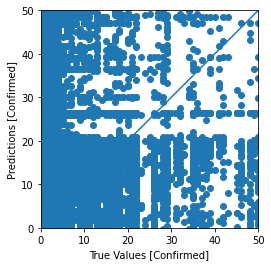

In [79]:
a = plt.axes(aspect='equal')
plt.scatter(target_test, test_predictions)
plt.xlabel('True Values [Confirmed]')
plt.ylabel('Predictions [Confirmed]')


lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)